In [1]:
import pandas as pd
import os

In [2]:
def calculate_accuracy(data):
    if 'parsed_answer' not in data.columns or 'correct_answer' not in data.columns:
        raise ValueError("DataFrame must contain 'parsed_answer' and 'correct_answer' columns")
    
    correct_predictions = (data['parsed_answer'] == data['correct_answer']).sum()
    total_predictions = data.shape[0]
    
    accuracy = correct_predictions / total_predictions
    
    return accuracy

In [3]:
all_results = os.listdir('../results/story_far_all_prompts/')

In [4]:
MODEL = "starling7b-beta"

In [5]:
import re

def extract_prompt_info(filenames):
    extracted_info = []
    for filename in filenames:
        match = re.search(r'story_analogies-\d+_(.*?)-(\d+)\.csv', filename)
        if match:
            prompt_type = match.group(1)
            run_number = match.group(2)
            extracted_info.append((prompt_type, run_number))
    return extracted_info

# Majority voting

In [6]:
from collections import Counter

In [7]:
def majority_vote(*args):
    return [Counter(votes).most_common(1)[0][0] for votes in zip(*args)]

In [8]:
def get_results_for_model(MODEL):
    model_results = sorted([res for res in all_results if MODEL in res])

    results_final = []

    for res_file in model_results:
        data = pd.read_csv('../results/story_far_all_prompts/' + res_file)[['parsed_answer', 'correct_answer']]
        (prompt_type, prompt_number) = extract_prompt_info([res_file])[0]
    
        accuracy = calculate_accuracy(data)
        results_final.append({'prompt_type': prompt_type, 'prompt_number': prompt_number, 'accuracy': accuracy})

    final_results_df = pd.DataFrame(results_final)

    results_majority = []
    
    for i in range(0, len(model_results), 3):
        prompt_1 = model_results[i]
        prompt_2 = model_results[i + 1]
        prompt_3 = model_results[i + 2]
        print(prompt_1, prompt_2, prompt_3)
    
        data_1 = pd.read_csv('../results/story_far_all_prompts/' + prompt_1)[['parsed_answer', 'correct_answer']]
        data_2 = pd.read_csv('../results/story_far_all_prompts/' + prompt_2)[['parsed_answer', 'correct_answer']]
        data_3 = pd.read_csv('../results/story_far_all_prompts/' + prompt_3)[['parsed_answer', 'correct_answer']]
    
        data_1['parsed_answer'] = majority_vote(data_1['parsed_answer'], data_2['parsed_answer'], data_3['parsed_answer'])
    
        (prompt_type, prompt_number) = extract_prompt_info([prompt_1])[0]
    
        accuracy = calculate_accuracy(data_1)
        results_majority.append({'prompt_type': prompt_type, 'accuracy': accuracy})

    return final_results_df, pd.DataFrame(results_majority)

# Compare models

In [9]:
_, mistral_majority = get_results_for_model('mistral7b')

story_analogies_far_mistral7b_prompt_templates-story_analogies-1_basic_prompt_not_forced-1.csv story_analogies_far_mistral7b_prompt_templates-story_analogies-1_basic_prompt_not_forced-2.csv story_analogies_far_mistral7b_prompt_templates-story_analogies-1_basic_prompt_not_forced-3.csv
story_analogies_far_mistral7b_prompt_templates-story_analogies-2_basic_prompt_forced-1.csv story_analogies_far_mistral7b_prompt_templates-story_analogies-2_basic_prompt_forced-2.csv story_analogies_far_mistral7b_prompt_templates-story_analogies-2_basic_prompt_forced-3.csv
story_analogies_far_mistral7b_prompt_templates-story_analogies-3_cot-1.csv story_analogies_far_mistral7b_prompt_templates-story_analogies-3_cot-2.csv story_analogies_far_mistral7b_prompt_templates-story_analogies-3_cot-3.csv
story_analogies_far_mistral7b_prompt_templates-story_analogies-4_cot_structured-1.csv story_analogies_far_mistral7b_prompt_templates-story_analogies-4_cot_structured-2.csv story_analogies_far_mistral7b_prompt_template

In [10]:
_, llama_majority = get_results_for_model('llama3')

story_analogies_far_llama3_prompt_templates-story_analogies-1_basic_prompt_not_forced-1.csv story_analogies_far_llama3_prompt_templates-story_analogies-1_basic_prompt_not_forced-2.csv story_analogies_far_llama3_prompt_templates-story_analogies-1_basic_prompt_not_forced-3.csv
story_analogies_far_llama3_prompt_templates-story_analogies-2_basic_prompt_forced-1.csv story_analogies_far_llama3_prompt_templates-story_analogies-2_basic_prompt_forced-2.csv story_analogies_far_llama3_prompt_templates-story_analogies-2_basic_prompt_forced-3.csv
story_analogies_far_llama3_prompt_templates-story_analogies-3_cot-1.csv story_analogies_far_llama3_prompt_templates-story_analogies-3_cot-2.csv story_analogies_far_llama3_prompt_templates-story_analogies-3_cot-3.csv
story_analogies_far_llama3_prompt_templates-story_analogies-4_cot_structured-1.csv story_analogies_far_llama3_prompt_templates-story_analogies-4_cot_structured-2.csv story_analogies_far_llama3_prompt_templates-story_analogies-4_cot_structured-3

In [11]:
_, starling_majority = get_results_for_model('starling7b-beta')

story_analogies_far_starling7b-beta_prompt_templates-story_analogies-1_basic_prompt_not_forced-1.csv story_analogies_far_starling7b-beta_prompt_templates-story_analogies-1_basic_prompt_not_forced-2.csv story_analogies_far_starling7b-beta_prompt_templates-story_analogies-1_basic_prompt_not_forced-3.csv
story_analogies_far_starling7b-beta_prompt_templates-story_analogies-2_basic_prompt_forced-1.csv story_analogies_far_starling7b-beta_prompt_templates-story_analogies-2_basic_prompt_forced-2.csv story_analogies_far_starling7b-beta_prompt_templates-story_analogies-2_basic_prompt_forced-3.csv
story_analogies_far_starling7b-beta_prompt_templates-story_analogies-3_cot-1.csv story_analogies_far_starling7b-beta_prompt_templates-story_analogies-3_cot-2.csv story_analogies_far_starling7b-beta_prompt_templates-story_analogies-3_cot-3.csv
story_analogies_far_starling7b-beta_prompt_templates-story_analogies-4_cot_structured-1.csv story_analogies_far_starling7b-beta_prompt_templates-story_analogies-4_

In [12]:
mistral_majority['model'] = 'mistral7b'

In [13]:
llama_majority['model'] = 'llama3'

In [14]:
starling_majority['model'] = 'starling7b'

In [15]:
df = pd.concat([starling_majority, llama_majority, mistral_majority])

In [16]:
df

,prompt_type,accuracy,model
0,basic_prompt_not_forced,0.722222,starling7b
1,basic_prompt_forced,0.722222,starling7b
2,cot,0.722222,starling7b
3,cot_structured,0.777778,starling7b
0,basic_prompt_not_forced,0.666667,llama3
1,basic_prompt_forced,0.694444,llama3
2,cot,0.666667,llama3
3,cot_structured,0.638889,llama3
0,basic_prompt_not_forced,0.694444,mistral7b
1,basic_prompt_forced,0.638889,mistral7b


In [17]:
import matplotlib.pyplot as plt

,prompt_type,accuracy,model
0,basic_prompt_not_forced,0.722222,starling7b
0,basic_prompt_not_forced,0.666667,llama3
0,basic_prompt_not_forced,0.694444,mistral7b


,prompt_type,accuracy,model
1,basic_prompt_forced,0.722222,starling7b
1,basic_prompt_forced,0.694444,llama3
1,basic_prompt_forced,0.638889,mistral7b


,prompt_type,accuracy,model
2,cot,0.722222,starling7b
2,cot,0.666667,llama3
2,cot,0.611111,mistral7b


,prompt_type,accuracy,model
3,cot_structured,0.777778,starling7b
3,cot_structured,0.638889,llama3
3,cot_structured,0.777778,mistral7b


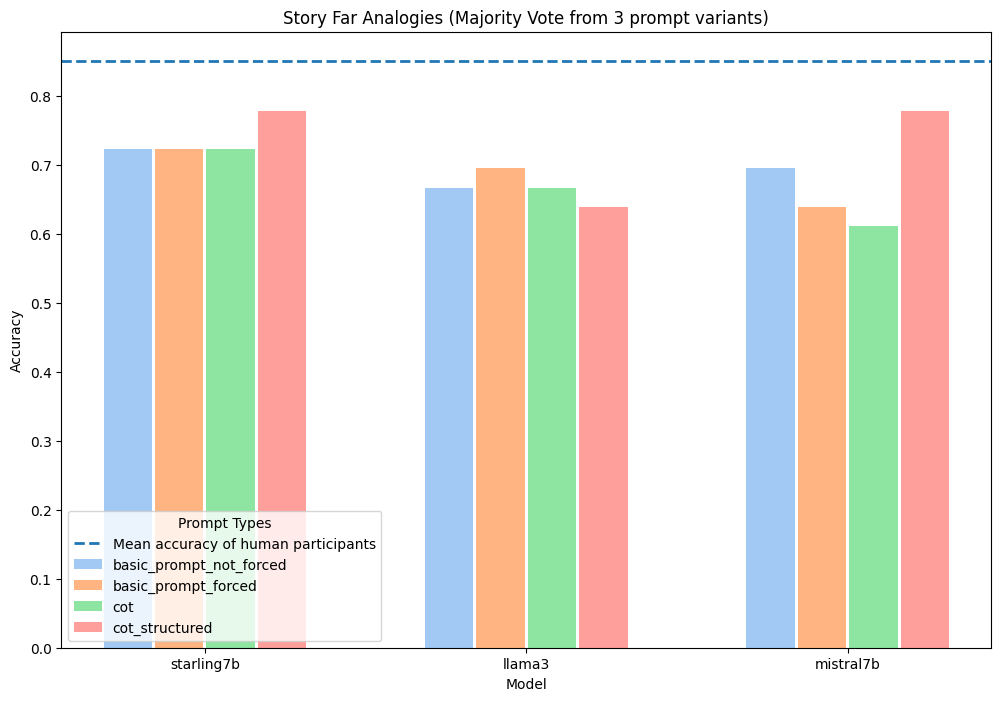

In [40]:
# colors = {
#     'basic_prompt_not_forced': 'tab:blue',
#     'basic_prompt_forced': 'tab:orange',
#     'cot': 'tab:green',
#     'cot_structured': 'tab:red'
# }

palette = 'pastel'

colors = {
    'basic_prompt_not_forced': sns.color_palette(palette)[0],
    'basic_prompt_forced': sns.color_palette(palette)[1],
    'cot': sns.color_palette(palette)[2],
    'cot_structured':sns.color_palette(palette)[3],
}


# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Unique data points
unique_data = df['model'].unique()
width = 0.15  # Width of the bars
positions = range(len(unique_data))


# Offset positions for each prompt type
offsets = {
    'basic_prompt_not_forced': -1.5*width - 0.015,
    'basic_prompt_forced': -0.5*width - 0.005,
    'cot': 0.5*width + 0.005,
    'cot_structured': 1.5*width + 0.015
}

for pt in df['prompt_type'].unique():
    model_data = df[df['prompt_type'] == pt]
    display(model_data)
    positions_with_offset = [p + offsets[pt] for p in positions]
    ax.bar(positions_with_offset, model_data['accuracy'], width=width, label=pt, color=colors[pt])

ax.axhline(0.85, linewidth=2, label='Mean accuracy of human participants', linestyle='dashed')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Story Far Analogies (Majority Vote from 3 prompt variants)')
ax.set_xticks(positions)
ax.set_xticklabels(unique_data)
ax.legend(title='Prompt Types', loc='lower left')

plt.savefig('story_far_results.png')
plt.show()

In [22]:
import seaborn as sns

In [26]:
sns.color_palette("Set2")[0]

(0.4, 0.7607843137254902, 0.6470588235294118)